- How does number of visa applications evolve over time
- does the number of tourist visa decrease or increase
- does the number of long-term visa decrease or increase

1) Ablehnungsquote in den GUS-Staaten im Vergleich - im welchem Land wird es am häufigsten abgelehnt und die meisten Visa ausgegeben. Die Länder, die uns interessieren, sind: Russland, Weißrussland, Armenien, Kasakhstan, Usbekistan, Aserbaidschan, Kirgisistan, Tadschikistan,  Turkmenistan. Wir gehen davon aus, dass Anträge von Menschen aus zentralasiatischen Ländern öfter abgelehnt werden als z.B. aus Russland oder Weißrussland.

2) Ablehnungsquote in Russland im Vergleich - hier muss man die Infos von allen deutschen Konsulaten und Visa-Zentren in Russland vergleichen.

3) Hypothese: wir vermuten, dass Russen in den letzten Jahren weniger mit touristischen Zwecken nach Deutschland reisen wegen der antiwestlichen Propaganda und der Finanzkrise. Dagegen reisen mehr Menschen aus Russland aus, um in Deutschland dauerhaft zu bleiben, zu studieren oder politischen Asyl zu beantragen. Um das zu überprüfen, braucht man die Daten von 2012 bis heute, bzw. 2017 - das ist die letzte Putins Legislaturperiode. Die Daten müssen auch unterschiedliche Visa-Typen abdecken. Wie besprochen, wir wären sehr dankbar, wenn Du eine entsprechende Anfrage ans AA schicken könntest.

Von unserer ist meine Kollegin Marina Aliyeva die Ansprechpartnerin für dieses Projekt.

Putins Legislaturperiode: 2012 bis 2017


In [2]:
#loading all charting libraries and tools needed
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import dateutil.parser
import numpy as np
import seaborn as sns
import squarify
from statsmodels.graphics.mosaicplot import mosaic
import pylab
from itertools import product

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 30)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [3]:
list(range(2008,2018))

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

In [4]:
# Read in the csv file on visa applications from each year
# Add a column on what year they refer to
# Create one large table out of all of them

visa_applications = pd.DataFrame()

for year in list(range(2008,2018)):
    df = pd.read_csv("data/output/Visa-Antraege-"+str(year)+".csv")
    df['year'] = year
    visa_applications = visa_applications.append(df)
    
visa_applications = visa_applications.reset_index()

In [5]:
visa_applications.head()

,index,AV-Ort,D Ablehnungsquote,D gesamt abgelehnt,D gesamt bearbeitet,D gesamt erteilt,D gesamt zurückgezogen,Land,Schengen Ablehnungsquote,Schengen gesamt abgelehnt,Schengen gesamt bearbeitet,Schengen gesamt erteilt,Schengen gesamt zurückgezogen,year
0,0,Kabul,23.22%,186,801,615.0,NaN,Afghanistan,43.25%,1268,2932,1664,NaN,2008
1,1,Kairo,16.58%,274,1653,1379.0,NaN,Ägypten,14.35%,3493,24334,20841,NaN,2008
2,2,Tirana,23.89%,150,628,478.0,NaN,Albanien,15.57%,1958,12574,10616,NaN,2008
3,3,Algier,22.70%,111,489,378.0,NaN,Algerien,22.17%,1657,7473,5816,NaN,2008
4,4,Luanda,16.22%,12,74,62.0,NaN,Angola,19.59%,389,1986,1597,NaN,2008


In [6]:
visa_applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 14 columns):
index                            1968 non-null int64
AV-Ort                           1783 non-null object
D Ablehnungsquote                1968 non-null object
D gesamt abgelehnt               1968 non-null int64
D gesamt bearbeitet              1968 non-null int64
D gesamt erteilt                 1967 non-null float64
D gesamt zurückgezogen           964 non-null float64
Land                             1968 non-null object
Schengen Ablehnungsquote         1968 non-null object
Schengen gesamt abgelehnt        1968 non-null int64
Schengen gesamt bearbeitet       1968 non-null int64
Schengen gesamt erteilt          1968 non-null int64
Schengen gesamt zurückgezogen    964 non-null float64
year                             1968 non-null int64
dtypes: float64(3), int64(7), object(4)
memory usage: 215.3+ KB


In [7]:
# convert percentage strings to numbers

def delete_percentage_sign(string):
    try:
        number = string.strip("%")
        return float(number)
    except:
        pass

list_quota_columns = ['Schengen Ablehnungsquote','D Ablehnungsquote']

for column in list_quota_columns:
    column_name = column.replace(" ", "_") + "_percent"
    visa_applications[column_name] = visa_applications[column].apply(delete_percentage_sign)

In [8]:
#checking whether conversion worked correctly
visa_applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 16 columns):
index                               1968 non-null int64
AV-Ort                              1783 non-null object
D Ablehnungsquote                   1968 non-null object
D gesamt abgelehnt                  1968 non-null int64
D gesamt bearbeitet                 1968 non-null int64
D gesamt erteilt                    1967 non-null float64
D gesamt zurückgezogen              964 non-null float64
Land                                1968 non-null object
Schengen Ablehnungsquote            1968 non-null object
Schengen gesamt abgelehnt           1968 non-null int64
Schengen gesamt bearbeitet          1968 non-null int64
Schengen gesamt erteilt             1968 non-null int64
Schengen gesamt zurückgezogen       964 non-null float64
year                                1968 non-null int64
Schengen_Ablehnungsquote_percent    1920 non-null float64
D_Ablehnungsquote_percent           1966 no

In [9]:
visa_applications.head()

,index,AV-Ort,D Ablehnungsquote,D gesamt abgelehnt,D gesamt bearbeitet,D gesamt erteilt,D gesamt zurückgezogen,Land,Schengen Ablehnungsquote,Schengen gesamt abgelehnt,Schengen gesamt bearbeitet,Schengen gesamt erteilt,Schengen gesamt zurückgezogen,year,Schengen_Ablehnungsquote_percent,D_Ablehnungsquote_percent
0,0,Kabul,23.22%,186,801,615.0,NaN,Afghanistan,43.25%,1268,2932,1664,NaN,2008,43.25,23.22
1,1,Kairo,16.58%,274,1653,1379.0,NaN,Ägypten,14.35%,3493,24334,20841,NaN,2008,14.35,16.58
2,2,Tirana,23.89%,150,628,478.0,NaN,Albanien,15.57%,1958,12574,10616,NaN,2008,15.57,23.89
3,3,Algier,22.70%,111,489,378.0,NaN,Algerien,22.17%,1657,7473,5816,NaN,2008,22.17,22.70
4,4,Luanda,16.22%,12,74,62.0,NaN,Angola,19.59%,389,1986,1597,NaN,2008,19.59,16.22


In [10]:
# # only keeping the cleaned-up columns
visa_applications = visa_applications[['index', 'year' ,'Land', 'AV-Ort','Schengen gesamt bearbeitet','Schengen gesamt zurückgezogen','Schengen gesamt erteilt', 'Schengen gesamt abgelehnt','Schengen_Ablehnungsquote_percent','D gesamt bearbeitet','D gesamt zurückgezogen','D gesamt erteilt','D gesamt abgelehnt','D_Ablehnungsquote_percent']]

# giving the columns English titles
visa_applications.columns = (['entry_index', 'year', 'country', 'local_branch', 'Schengen_processed_applications', 'Schengen_withdrawn_applications', 'Schengen_granted_applications', 'Schengen_rejected_applications', 'Schengen_share_rejected', 'GER_processed_applications', 'GER_withdrawn_applications', 'GER_granted_applications', 'GER_rejected_applications','GER_share_rejected'])

In [11]:
visa_applications.head(20)

,entry_index,year,country,local_branch,Schengen_processed_applications,Schengen_withdrawn_applications,Schengen_granted_applications,Schengen_rejected_applications,Schengen_share_rejected,GER_processed_applications,GER_withdrawn_applications,GER_granted_applications,GER_rejected_applications,GER_share_rejected
0,0,2008,Afghanistan,Kabul,2932,NaN,1664,1268,43.25,801,NaN,615.0,186,23.22
1,1,2008,Ägypten,Kairo,24334,NaN,20841,3493,14.35,1653,NaN,1379.0,274,16.58
2,2,2008,Albanien,Tirana,12574,NaN,10616,1958,15.57,628,NaN,478.0,150,23.89
3,3,2008,Algerien,Algier,7473,NaN,5816,1657,22.17,489,NaN,378.0,111,22.70
4,4,2008,Angola,Luanda,1986,NaN,1597,389,19.59,74,NaN,62.0,12,16.22
5,5,2008,Argentinien,Buenos Aires,233,NaN,226,7,3.00,735,NaN,681.0,54,7.35
6,6,2008,Armenien,Eriwan,8351,NaN,7003,1348,16.14,430,NaN,304.0,126,29.30
7,7,2008,Aserbaidschan,Baku,10739,NaN,9979,760,7.08,435,NaN,387.0,48,11.03
8,8,2008,Äthiopien,Addis Abeba,4793,NaN,4328,465,9.70,515,NaN,428.0,87,16.89
9,9,2008,Australien,Canberra,63,NaN,61,2,3.17,44,NaN,44.0,0,0.00


In [12]:
visa_applications.to_csv('data/output/visa_applications_2008to2017.csv')

# Reading in cleaned data

In [13]:
visa_applications = pd.read_csv('data/output/visa_applications_2008to2017-refined.csv')

In [14]:
visa_applications['year_text'] = [str(year).replace("20","'") for year in visa_applications['year']]

In [15]:
visa_applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 16 columns):
Column                             1968 non-null int64
entry_index                        1968 non-null int64
year                               1968 non-null int64
country                            1968 non-null object
local_branch                       1959 non-null object
Schengen_processed_applications    1968 non-null int64
Schengen_withdrawn_applications    964 non-null float64
Schengen_granted_applications      1968 non-null int64
Schengen_rejected_applications     1968 non-null int64
Schengen_share_rejected            1920 non-null float64
GER_processed_applications         1968 non-null int64
GER_withdrawn_applications         964 non-null float64
GER_granted_applications           1967 non-null float64
GER_rejected_applications          1968 non-null int64
GER_share_rejected                 1966 non-null float64
year_text                          1968 non-null object
dt

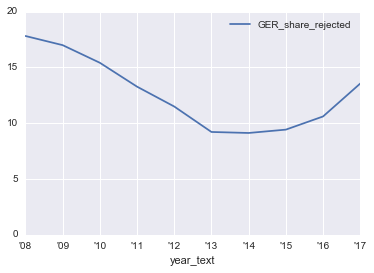

In [16]:
visa_applications[visa_applications['country']=='Gesamt'].plot(x='year_text', y='GER_share_rejected', ylim=(0,20))

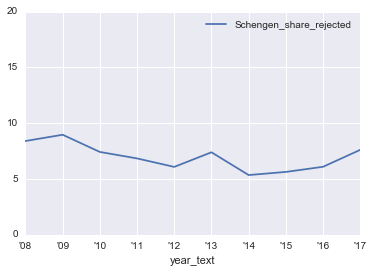

In [17]:
visa_applications[visa_applications['country']=='Gesamt'].plot(x='year_text', y='Schengen_share_rejected', ylim=(0,20))

# Focusing on countries of interest

In [18]:
selected_countries = ["Russische Föderation","Weißrussland","Armenien","Kasachstan","Usbekistan","Aserbaidschan","Kirgisistan","Tadschikistan","Turkmenistan"]

In [19]:
selected_df = visa_applications[(visa_applications['country']=="Russische Föderation")|(visa_applications['country']=="Weißrussland")|(visa_applications['country']=="Armenien")|(visa_applications['country']=="Kasachstan")|(visa_applications['country']=="Usbekistan")|(visa_applications['country']=="Aserbaidschan")|(visa_applications['country']=="Kirgisistan")|(visa_applications['country']=="Tadschikistan")|(visa_applications['country']=="Turkmenistan")]
selected_df.head()

,Column,entry_index,year,country,local_branch,Schengen_processed_applications,Schengen_withdrawn_applications,Schengen_granted_applications,Schengen_rejected_applications,Schengen_share_rejected,GER_processed_applications,GER_withdrawn_applications,GER_granted_applications,GER_rejected_applications,GER_share_rejected,year_text
6,6,6,2008,Armenien,Eriwan,8351,NaN,7003,1348,16.14,430,NaN,304.0,126,29.30,'08
7,7,7,2008,Aserbaidschan,Baku,10739,NaN,9979,760,7.08,435,NaN,387.0,48,11.03,'08
82,82,82,2008,Kasachstan,Almaty,15528,NaN,14905,623,4.01,812,NaN,646.0,166,20.44,'08
83,83,83,2008,Kasachstan,Astana,18592,NaN,15907,2685,14.44,1746,NaN,1652.0,94,5.38,'08
84,84,84,2008,Kasachstan,Gesamt,34120,NaN,30812,3308,9.70,2558,NaN,2298.0,260,10.16,'08


In [20]:
selected_df['local_branch'].value_counts()

Gesamt           20
St Petersburg    10
Bischkek         10
Kaliningrad      10
Aschgabat        10
Baku             10
Almaty           10
Taschkent        10
Moskau           10
Duschanbe        10
Eriwan           10
Minsk            10
Jekaterinburg    10
Nowosibirsk      10
Astana           10
Name: local_branch, dtype: int64

In [21]:
selected_df['location'] = selected_df['country'] + ": " +selected_df['local_branch']

In [22]:
selected_df['Schengen_decided_applications'] = selected_df['Schengen_granted_applications']+selected_df['Schengen_rejected_applications']
selected_df['GER_decided_applications'] = selected_df['GER_granted_applications']+selected_df['GER_rejected_applications']
selected_df['GER_share_negative'] = selected_df['GER_rejected_applications']/selected_df['GER_decided_applications']*100
selected_df['Schengen_share_negative'] = selected_df['Schengen_rejected_applications']/selected_df['Schengen_decided_applications']*100

In [23]:
location_list = []

for location in selected_df['location']:
    location_list.append(location)
    
unique_list = set(location_list)

In [24]:
unique_list

{'Armenien: Eriwan',
 'Aserbaidschan: Baku',
 'Kasachstan: Almaty',
 'Kasachstan: Astana',
 'Kasachstan: Gesamt',
 'Kirgisistan: Bischkek',
 'Russische Föderation: Gesamt',
 'Russische Föderation: Jekaterinburg',
 'Russische Föderation: Kaliningrad',
 'Russische Föderation: Moskau',
 'Russische Föderation: Nowosibirsk',
 'Russische Föderation: St Petersburg',
 'Tadschikistan: Duschanbe',
 'Turkmenistan: Aschgabat',
 'Usbekistan: Taschkent',
 'Weißrussland: Minsk'}

# How has the rejection rate for different visa types developed in different locations?

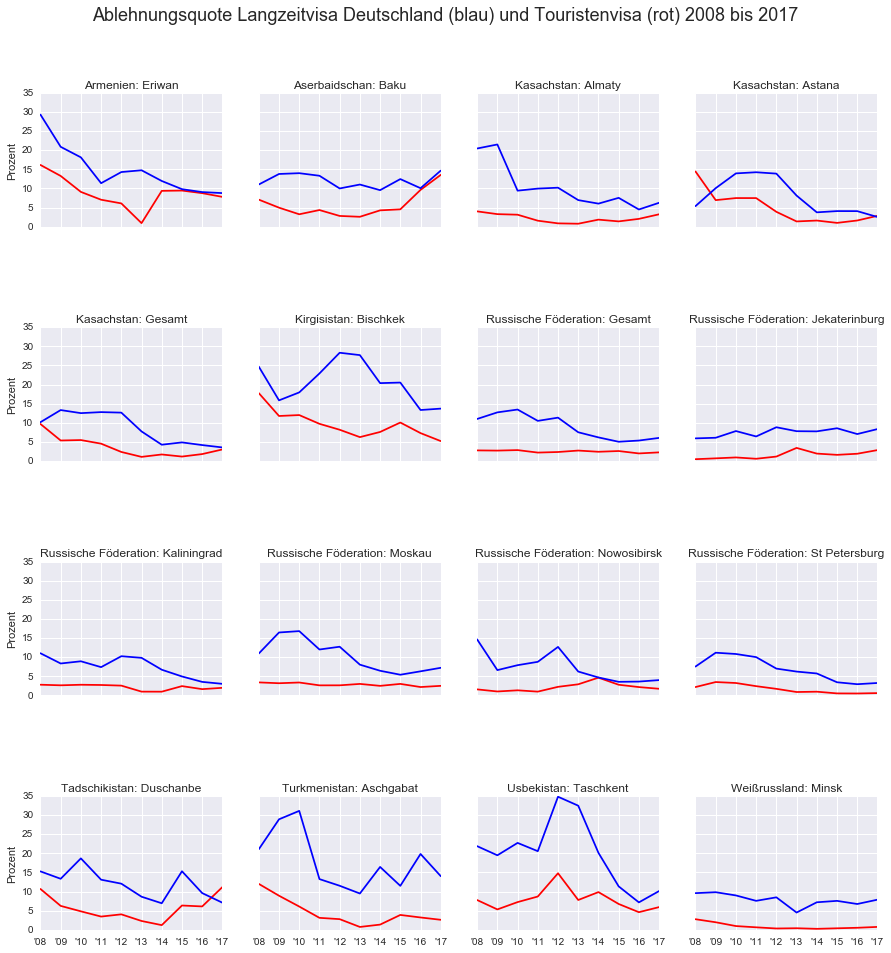

In [25]:
df = selected_df.copy()
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True, sharey=True, figsize=(15,15))
axes_list = [item for sublist in axes for item in sublist]

grouped = df.groupby("location")

ordered_country_names = sorted(unique_list)

for countryname in ordered_country_names:
    selection = grouped.get_group(countryname)
    
    ax = axes_list.pop(0)
    selection.plot(x='year_text', y='Schengen_share_negative', label = countryname, ax=ax, legend = False, c='red')
    selection.plot(x='year_text', y='GER_share_negative', label = countryname, ax=ax, legend = False, c='blue')
    ax.set_title(countryname)
    ax.tick_params(
        which='minor',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.tick_params(
        which='major',
        bottom='on',
        left='off',
        right='off',
        top='off'
    )
    #ax.grid(linewidth=0.25)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")
    ax.set_ylabel("Prozent")
    
for ax in axes_list:
    ax.remove()
    
fig.suptitle("Ablehnungsquote Langzeitvisa Deutschland (blau) und Touristenvisa (rot) 2008 bis 2017", fontsize=18)  
    
# plt.savefig('editorial-team-info/Russland-Ablehnungsquote-Visatypen-Zeitreihe.pdf')    
    
plt.subplots_adjust(hspace=0.75)

# In absolute terms, how many tourist visa are filed and how many are rejected?

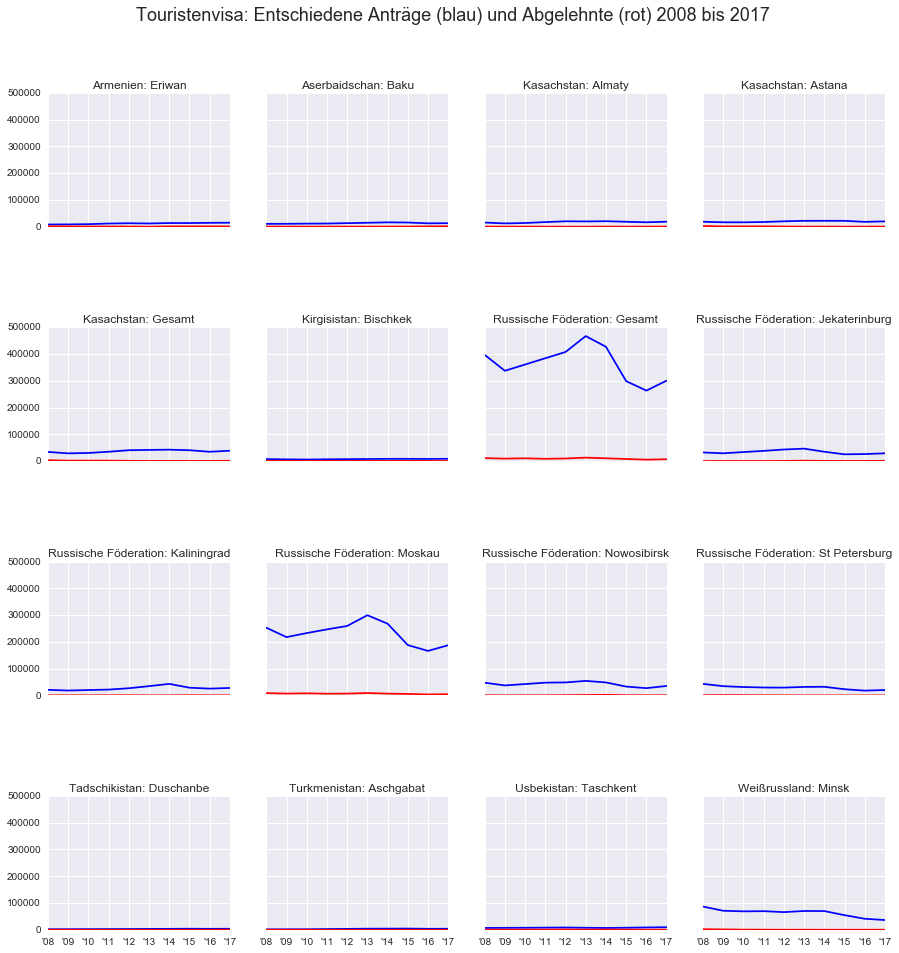

In [26]:
df = selected_df.copy()
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True, sharey=True, figsize=(15,15))
axes_list = [item for sublist in axes for item in sublist]

grouped = df.groupby("location")

ordered_country_names = sorted(unique_list)

for countryname in ordered_country_names:
    selection = grouped.get_group(countryname)
    
    ax = axes_list.pop(0)
    selection.plot(x='year_text', y='Schengen_decided_applications', label = countryname, ax=ax, legend = False, c='blue')
    selection.plot(x='year_text', y='Schengen_rejected_applications', label = countryname, ax=ax, legend = False, c='red')
    ax.set_title(countryname)
    ax.tick_params(
        which='minor',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.tick_params(
        which='major',
        bottom='on',
        left='off',
        right='off',
        top='off'
    )
    #ax.grid(linewidth=0.25)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")
#     ax.set_ylabel("Prozent")
    
for ax in axes_list:
    ax.remove()
    
fig.suptitle("Touristenvisa: Entschiedene Anträge (blau) und Abgelehnte (rot) 2008 bis 2017", fontsize=18)  
    
# plt.savefig('editorial-team-info/Russland-Touristenvisa-Ablehnungen-Zeitreihe.pdf')    
    
plt.subplots_adjust(hspace=0.75)

# In absolute terms, how many visa applications were filed at each location for tourist and long-term visa?

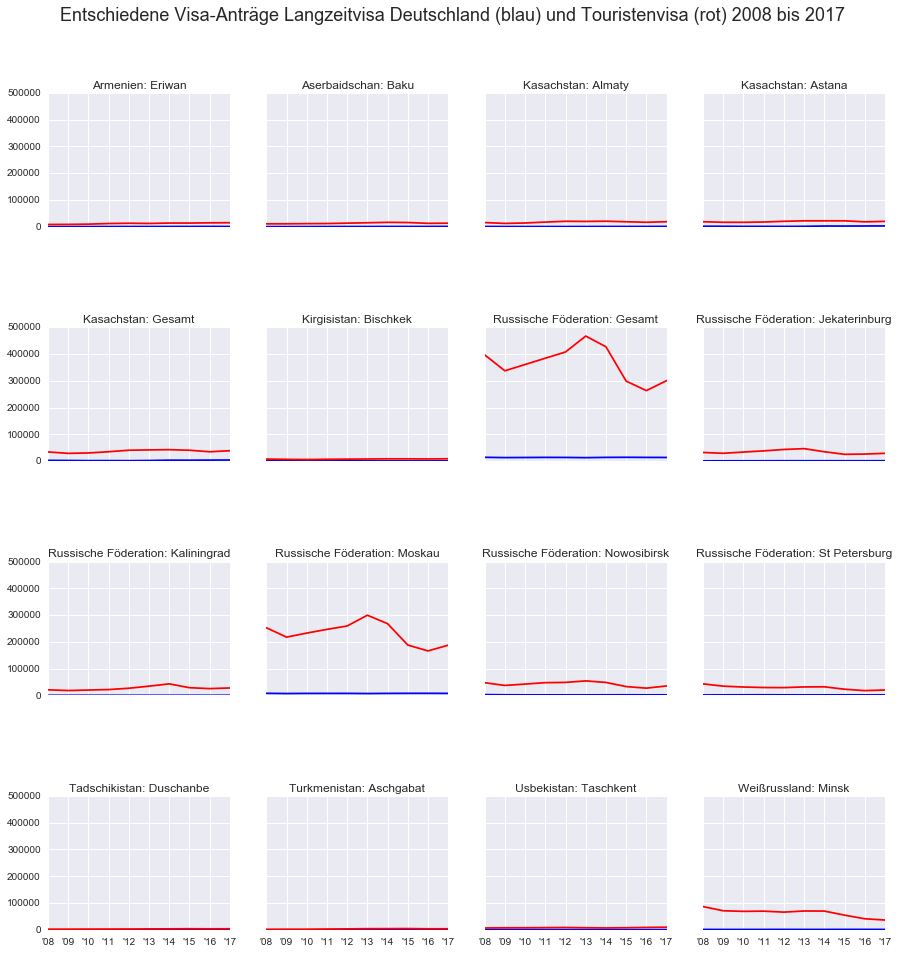

In [27]:
df = selected_df.copy()
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True, sharey=True, figsize=(15,15))
axes_list = [item for sublist in axes for item in sublist]

grouped = df.groupby("location")

ordered_country_names = sorted(unique_list)

for countryname in ordered_country_names:
    selection = grouped.get_group(countryname)
    
    ax = axes_list.pop(0)
    selection.plot(x='year_text', y='GER_decided_applications', label = countryname, ax=ax, legend = False, c = "blue")
    selection.plot(x='year_text', y='Schengen_decided_applications', label = countryname, ax=ax, legend = False, c = "red")
    ax.set_title(countryname)
    ax.tick_params(
        which='minor',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.tick_params(
        which='major',
        bottom='on',
        left='off',
        right='off',
        top='off'
    )
    #ax.grid(linewidth=0.25)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")
    
for ax in axes_list:
    ax.remove()
    
fig.suptitle("Entschiedene Visa-Anträge Langzeitvisa Deutschland (blau) und Touristenvisa (rot) 2008 bis 2017", fontsize=18)
    
# plt.savefig('editorial-team-info/Russland-Antragszahlen-Zeitreihe.pdf')    
    
plt.subplots_adjust(hspace=0.75)

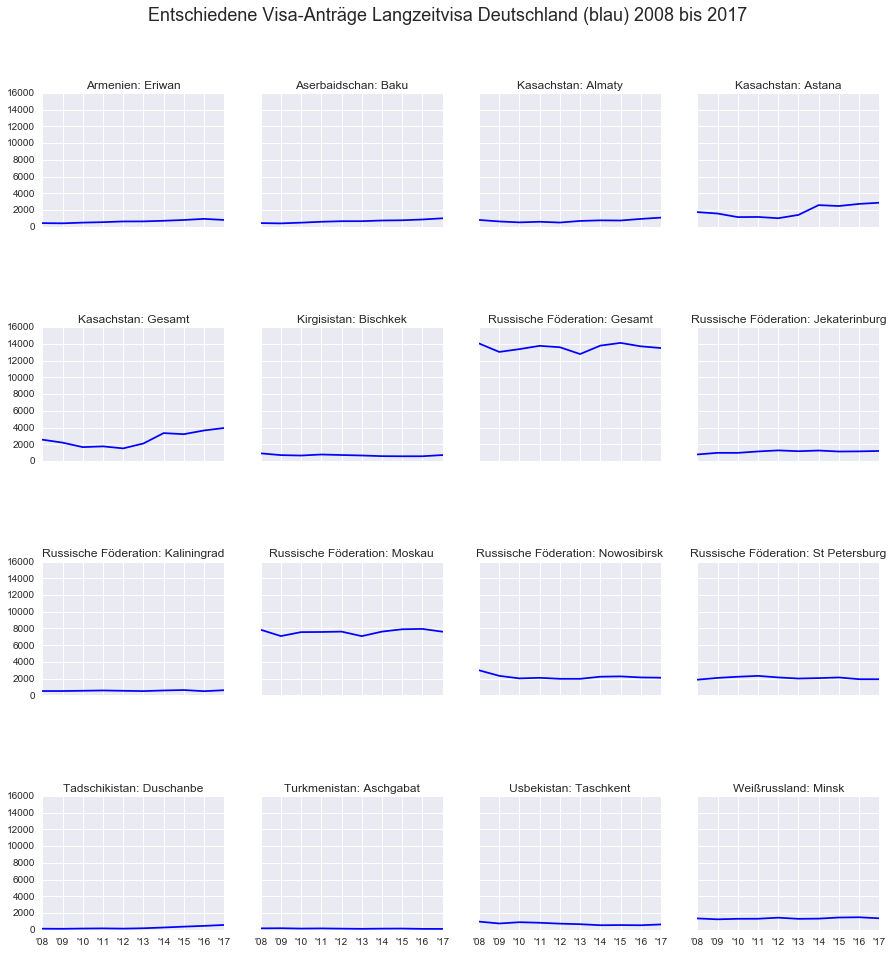

In [28]:
df = selected_df.copy()
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True, sharey=True, figsize=(15,15))
axes_list = [item for sublist in axes for item in sublist]

grouped = df.groupby("location")

ordered_country_names = sorted(unique_list)

for countryname in ordered_country_names:
    selection = grouped.get_group(countryname)
    
    ax = axes_list.pop(0)
    selection.plot(x='year_text', y='GER_decided_applications', label = countryname, ax=ax, legend = False, c = "blue")
#     selection.plot(x='year', y='Schengen_processed_applications', label = countryname, ax=ax, legend = False, c = "red")
    ax.set_title(countryname)
    ax.tick_params(
        which='minor',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.tick_params(
        which='major',
        bottom='on',
        left='off',
        right='off',
        top='off'
    )
    #ax.grid(linewidth=0.25)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")
    
for ax in axes_list:
    ax.remove()
    
fig.suptitle("Entschiedene Visa-Anträge Langzeitvisa Deutschland (blau) 2008 bis 2017", fontsize=18)
#   
# plt.savefig('editorial-team-info/Russland-Antragszahlen-Langzeitvisa-Zeitreihe.pdf')
    
plt.subplots_adjust(hspace=0.75)

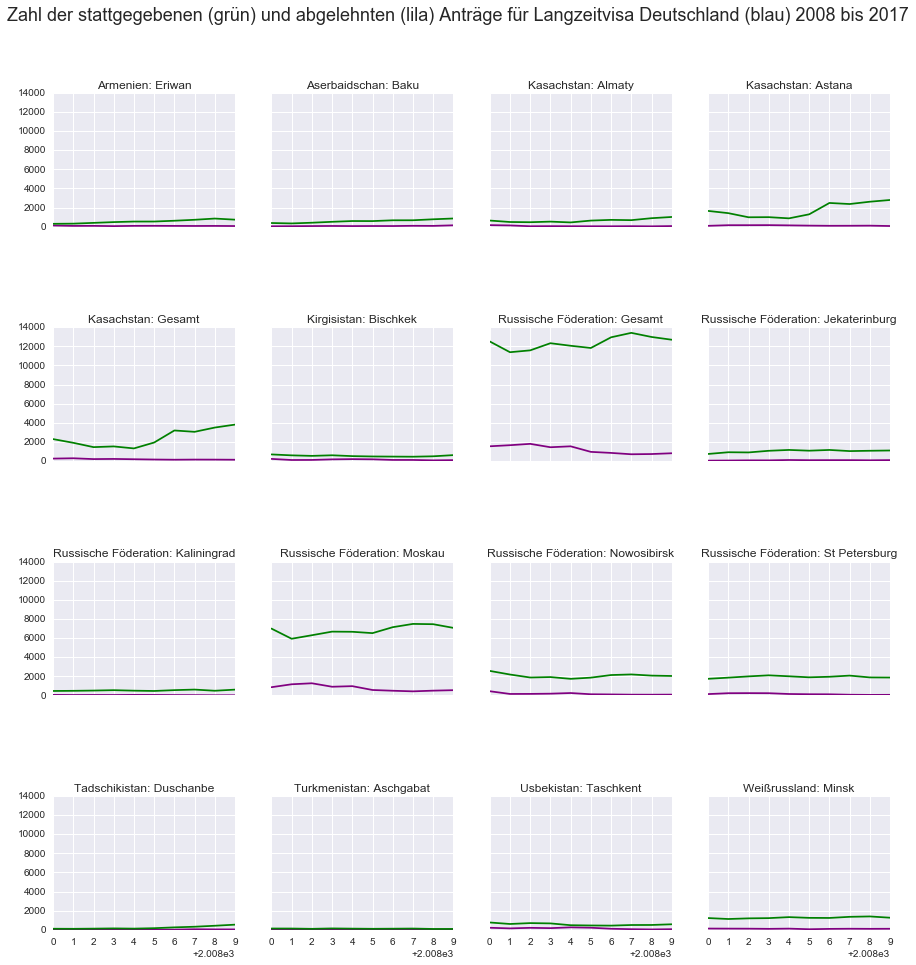

In [29]:
df = selected_df.copy()
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True, sharey=True, figsize=(15,15))
axes_list = [item for sublist in axes for item in sublist]

grouped = df.groupby("location")

ordered_country_names = sorted(unique_list)

for countryname in ordered_country_names:
    selection = grouped.get_group(countryname)
    
    ax = axes_list.pop(0)
    selection.plot(x='year', y='GER_rejected_applications', label = countryname, ax=ax, legend = False, c = "purple")
    selection.plot(x='year', y='GER_granted_applications', label = countryname, ax=ax, legend = False, c = "green")
#     selection.plot(x='year', y='Schengen_processed_applications', label = countryname, ax=ax, legend = False, c = "red")
    ax.set_title(countryname)
    ax.tick_params(
        which='minor',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.tick_params(
        which='major',
        bottom='on',
        left='off',
        right='off',
        top='off'
    )
    #ax.grid(linewidth=0.25)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")
    
for ax in axes_list:
    ax.remove()
    
fig.suptitle("Zahl der stattgegebenen (grün) und abgelehnten (lila) Anträge für Langzeitvisa Deutschland (blau) 2008 bis 2017", fontsize=18)
    
# plt.savefig('editorial-team-info/'+selected_continent+'-Visa-Applications-TimeSeries.pdf', transparent = True)    
    
plt.subplots_adjust(hspace=0.75)

In [30]:
# Add up over years
# -2008 bis 2017
# -2008 bis 2012
# -2013 bis 2017

entire_period = list(range(2008,2018))
print(entire_period)
first_period = list(range(2008,2013))
print(first_period)
second_period = list(range(2013,2018))
print(second_period)

threshold = 2012

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
[2008, 2009, 2010, 2011, 2012]
[2013, 2014, 2015, 2016, 2017]


In [31]:
entire = []

for location in unique_list:
    location_dict = {}
    location_dict['location']=location
    location_dict['Schengen_granted'] = selected_df[selected_df['location']==location]['Schengen_granted_applications'].sum()
    location_dict['Schengen_rejected'] = selected_df[selected_df['location']==location]['Schengen_rejected_applications'].sum()
    location_dict['GER_granted'] = selected_df[selected_df['location']==location]['GER_granted_applications'].sum()
    location_dict['GER_rejected'] = selected_df[selected_df['location']==location]['GER_rejected_applications'].sum()
    entire.append(location_dict)
    
entire_df = pd.DataFrame(entire)
entire_df['GER_decided'] = entire_df['GER_granted'] + entire_df['GER_rejected']
entire_df['GER_share_negative'] = entire_df['GER_rejected']/entire_df['GER_decided'] * 100
entire_df['Schengen_decided'] = entire_df['Schengen_granted'] + entire_df['Schengen_rejected']
entire_df['Schengen_share_negative'] = entire_df['Schengen_rejected']/entire_df['Schengen_decided'] * 100
entire_df = entire_df[['location','GER_decided','GER_granted','GER_rejected','GER_share_negative','Schengen_decided','Schengen_granted','Schengen_rejected','Schengen_share_negative']]
entire_df.sort_values(by='GER_share_negative', ascending = False)

,location,GER_decided,GER_granted,GER_rejected,GER_share_negative,Schengen_decided,Schengen_granted,Schengen_rejected,Schengen_share_negative
11,Kirgisistan: Bischkek,6940.0,5496.0,1444,20.806916,74624,67601,7023,9.411181
7,Usbekistan: Taschkent,7185.0,5694.0,1491,20.751566,79431,73189,6242,7.858393
1,Turkmenistan: Aschgabat,1433.0,1171.0,262,18.283322,32207,31061,1146,3.558233
9,Armenien: Eriwan,6403.0,5537.0,866,13.524910,120490,110359,10131,8.408167
2,Aserbaidschan: Baku,6622.0,5831.0,791,11.945032,130878,123516,7362,5.625086
8,Tadschikistan: Duschanbe,2596.0,2314.0,282,10.862866,30588,28875,1713,5.600235
0,Russische Föderation: Moskau,75894.0,68173.0,7721,10.173400,2318796,2252222,66574,2.871059
4,Kasachstan: Almaty,7266.0,6546.0,720,9.909166,173482,169824,3658,2.108576
14,Russische Föderation: Gesamt,135753.0,123669.0,12084,8.901461,3641126,3549123,92003,2.526773
3,Weißrussland: Minsk,13674.0,12605.0,1069,7.817756,634806,628481,6325,0.996367


In [32]:
entire_df.sort_values(by = 'Schengen_share_negative', ascending = False)

,location,GER_decided,GER_granted,GER_rejected,GER_share_negative,Schengen_decided,Schengen_granted,Schengen_rejected,Schengen_share_negative
11,Kirgisistan: Bischkek,6940.0,5496.0,1444,20.806916,74624,67601,7023,9.411181
9,Armenien: Eriwan,6403.0,5537.0,866,13.524910,120490,110359,10131,8.408167
7,Usbekistan: Taschkent,7185.0,5694.0,1491,20.751566,79431,73189,6242,7.858393
2,Aserbaidschan: Baku,6622.0,5831.0,791,11.945032,130878,123516,7362,5.625086
8,Tadschikistan: Duschanbe,2596.0,2314.0,282,10.862866,30588,28875,1713,5.600235
5,Kasachstan: Astana,18713.0,17496.0,1217,6.503500,193348,184443,8905,4.605685
1,Turkmenistan: Aschgabat,1433.0,1171.0,262,18.283322,32207,31061,1146,3.558233
15,Kasachstan: Gesamt,25979.0,24042.0,1937,7.456022,366830,354267,12563,3.424747
0,Russische Föderation: Moskau,75894.0,68173.0,7721,10.173400,2318796,2252222,66574,2.871059
14,Russische Föderation: Gesamt,135753.0,123669.0,12084,8.901461,3641126,3549123,92003,2.526773


In [34]:
import seaborn as sns

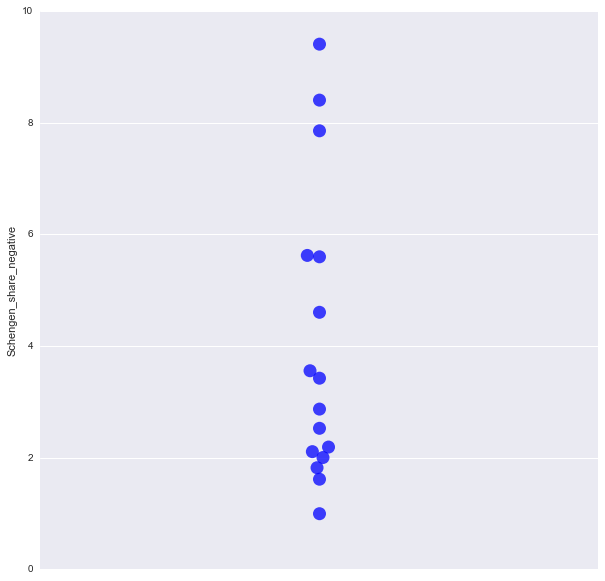

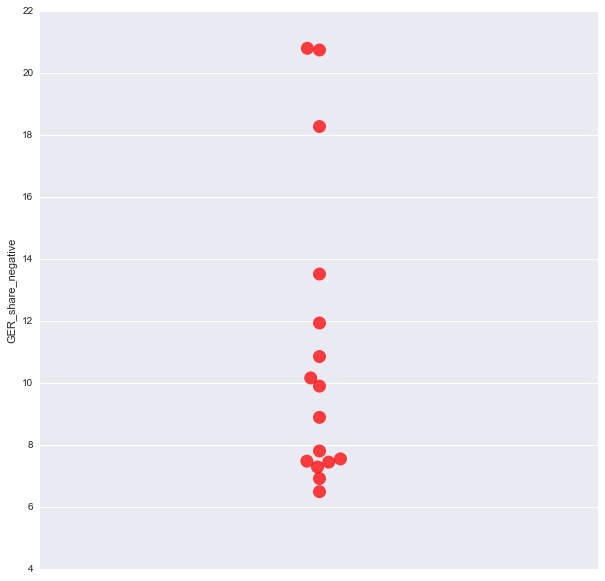

In [35]:
data_selection = entire_df

fig, ax = plt.subplots(figsize = (10,10))
sns.swarmplot(y="Schengen_share_negative", data=data_selection, color="blue", alpha=.75, s=13)
# plt.savefig('visuals/drafts/tourist-visa-rates.pdf', transparent = True)


fig, ax = plt.subplots(figsize = (10,10))
sns.swarmplot(y="GER_share_negative", data=data_selection, color="red", alpha=.75, s=13)
# plt.savefig('visuals/drafts/long-term-visa-rates.pdf', transparent = True)


In [36]:
first = []

for location in unique_list:
    location_dict = {}
    location_dict['location']=location
    location_dict['Schengen_granted'] = selected_df[(selected_df['location']==location)&(selected_df['year']<=threshold)]['Schengen_granted_applications'].sum()
    location_dict['Schengen_rejected'] = selected_df[(selected_df['location']==location)&(selected_df['year']<=threshold)]['Schengen_rejected_applications'].sum()
    location_dict['GER_granted'] = selected_df[(selected_df['location']==location)&(selected_df['year']<=threshold)]['GER_granted_applications'].sum()
    location_dict['GER_rejected'] = selected_df[(selected_df['location']==location)&(selected_df['year']<=threshold)]['GER_rejected_applications'].sum()
    first.append(location_dict)
    
first_df = pd.DataFrame(first)
first_df['GER_decided'] = first_df['GER_granted'] + first_df['GER_rejected']
first_df['GER_share_negative'] = first_df['GER_rejected']/first_df['GER_decided'] * 100
first_df['Schengen_decided'] = first_df['Schengen_granted'] + first_df['Schengen_rejected']
first_df['Schengen_share_negative'] = first_df['Schengen_rejected']/first_df['Schengen_decided'] * 100
first_df = first_df[['location','GER_decided','GER_granted','GER_rejected','GER_share_negative','Schengen_decided','Schengen_granted','Schengen_rejected','Schengen_share_negative']]
first_df.sort_values(by='GER_share_negative', ascending = False)

,location,GER_decided,GER_granted,GER_rejected,GER_share_negative,Schengen_decided,Schengen_granted,Schengen_rejected,Schengen_share_negative
7,Usbekistan: Taschkent,4219.0,3223.0,996,23.607490,38708,35241,3467,8.956805
11,Kirgisistan: Bischkek,3809.0,2964.0,845,22.184300,33575,29548,4027,11.994043
1,Turkmenistan: Aschgabat,811.0,637.0,174,21.454994,11640,10981,659,5.661512
9,Armenien: Eriwan,2503.0,2051.0,452,18.058330,51501,46498,5003,9.714374
4,Kasachstan: Almaty,3052.0,2592.0,460,15.072084,79354,77438,1916,2.414497
8,Tadschikistan: Duschanbe,710.0,607.0,103,14.507042,12338,11647,691,5.600584
0,Russische Föderation: Moskau,37715.0,32535.0,5180,13.734588,1209401,1172597,36804,3.043159
2,Aserbaidschan: Baku,2573.0,2257.0,316,12.281384,58341,55771,2570,4.405135
15,Kasachstan: Gesamt,9705.0,8525.0,1180,12.158681,168678,159598,9080,5.383038
14,Russische Föderation: Gesamt,67840.0,59840.0,8000,11.792453,1885673,1836833,48840,2.590057


In [37]:
second = []

for location in unique_list:
    location_dict = {}
    location_dict['location']=location
    location_dict['Schengen_granted'] = selected_df[(selected_df['location']==location)&(selected_df['year']>threshold)]['Schengen_granted_applications'].sum()
    location_dict['Schengen_rejected'] = selected_df[(selected_df['location']==location)&(selected_df['year']>threshold)]['Schengen_rejected_applications'].sum()
    location_dict['GER_granted'] = selected_df[(selected_df['location']==location)&(selected_df['year']>threshold)]['GER_granted_applications'].sum()
    location_dict['GER_rejected'] = selected_df[(selected_df['location']==location)&(selected_df['year']>threshold)]['GER_rejected_applications'].sum()
    second.append(location_dict)
    
second_df = pd.DataFrame(second)
second_df['GER_decided'] = second_df['GER_granted'] + second_df['GER_rejected']
second_df['GER_share_negative'] = second_df['GER_rejected']/second_df['GER_decided'] * 100
second_df['Schengen_decided'] = second_df['Schengen_granted'] + second_df['Schengen_rejected']
second_df['Schengen_share_negative'] = second_df['Schengen_rejected']/second_df['Schengen_decided'] * 100
second_df = second_df[['location','GER_decided','GER_granted','GER_rejected','GER_share_negative','Schengen_decided','Schengen_granted','Schengen_rejected','Schengen_share_negative']]
second_df.sort_values(by='GER_share_negative')

,location,GER_decided,GER_granted,GER_rejected,GER_share_negative,Schengen_decided,Schengen_granted,Schengen_rejected,Schengen_share_negative
5,Kasachstan: Astana,12060.0,11563.0,497,4.121061,104024,102283,1741,1.673652
6,Russische Föderation: St Petersburg,10117.0,9678.0,439,4.339231,125579,124638,941,0.749329
13,Russische Föderation: Nowosibirsk,10772.0,10299.0,473,4.391014,198578,192605,5973,3.007886
15,Kasachstan: Gesamt,16274.0,15517.0,757,4.651591,198152,194669,3483,1.757742
10,Russische Föderation: Kaliningrad,2894.0,2734.0,160,5.528680,160157,157705,2452,1.530998
14,Russische Föderation: Gesamt,67913.0,63829.0,4084,6.013576,1755453,1712290,43163,2.458796
4,Kasachstan: Almaty,4214.0,3954.0,260,6.169910,94128,92386,1742,1.850671
0,Russische Föderation: Moskau,38179.0,35638.0,2541,6.655491,1109395,1079625,29770,2.683445
3,Weißrussland: Minsk,6981.0,6506.0,475,6.804183,272538,271364,1174,0.430766
12,Russische Föderation: Jekaterinburg,5951.0,5480.0,471,7.914636,161744,157717,4027,2.489737


# Rejection rates in relation to overall number of decisions, 2013 to 2017

In [38]:
possible_decisions = ['GER_granted', 'GER_rejected']

mosaic_world = pd.DataFrame()

for decision_type in possible_decisions:
    temp = second_df[['location', decision_type]]
    temp['decision'] = decision_type
    temp=temp[['location', 'decision', decision_type]]
    temp.columns = (['location', 'decision', 'value'])
    mosaic_world = mosaic_world.append(temp)

In [39]:
mosaic_world.sort_values(['location', 'decision'], ascending = [True, True], inplace = True)
mosaic_world = mosaic_world.reset_index()
mosaic_world = mosaic_world[['location', 'decision', 'value']]
mosaic_world

,location,decision,value
0,Armenien: Eriwan,GER_granted,3486.0
1,Armenien: Eriwan,GER_rejected,414.0
2,Aserbaidschan: Baku,GER_granted,3574.0
3,Aserbaidschan: Baku,GER_rejected,475.0
4,Kasachstan: Almaty,GER_granted,3954.0
5,Kasachstan: Almaty,GER_rejected,260.0
6,Kasachstan: Astana,GER_granted,11563.0
7,Kasachstan: Astana,GER_rejected,497.0
8,Kasachstan: Gesamt,GER_granted,15517.0
9,Kasachstan: Gesamt,GER_rejected,757.0


In [40]:
mosaic_regions_list = []

for region in mosaic_world['location']:
    mosaic_regions_list.append(region)
    
mosaic_location_list = set(mosaic_regions_list)
sorted(mosaic_location_list)

['Armenien: Eriwan',
 'Aserbaidschan: Baku',
 'Kasachstan: Almaty',
 'Kasachstan: Astana',
 'Kasachstan: Gesamt',
 'Kirgisistan: Bischkek',
 'Russische Föderation: Gesamt',
 'Russische Föderation: Jekaterinburg',
 'Russische Föderation: Kaliningrad',
 'Russische Föderation: Moskau',
 'Russische Föderation: Nowosibirsk',
 'Russische Föderation: St Petersburg',
 'Tadschikistan: Duschanbe',
 'Turkmenistan: Aschgabat',
 'Usbekistan: Taschkent',
 'Weißrussland: Minsk']

In [41]:
location_applications = list(product(sorted(mosaic_location_list), ['granted', 'rejected']))

location_index = pd.MultiIndex.from_tuples(location_applications, names=['place', 'decision'])

location_series = pd.Series([float(value) for value in mosaic_world['value']], index = location_index)
location_series

place                                decision
Armenien: Eriwan                     granted      3486.0
                                     rejected      414.0
Aserbaidschan: Baku                  granted      3574.0
                                     rejected      475.0
Kasachstan: Almaty                   granted      3954.0
                                     rejected      260.0
Kasachstan: Astana                   granted     11563.0
                                     rejected      497.0
Kasachstan: Gesamt                   granted     15517.0
                                     rejected      757.0
Kirgisistan: Bischkek                granted      2532.0
                                     rejected      599.0
Russische Föderation: Gesamt         granted     63829.0
                                     rejected     4084.0
Russische Föderation: Jekaterinburg  granted      5480.0
                                     rejected      471.0
Russische Föderation: Kaliningrad    grant

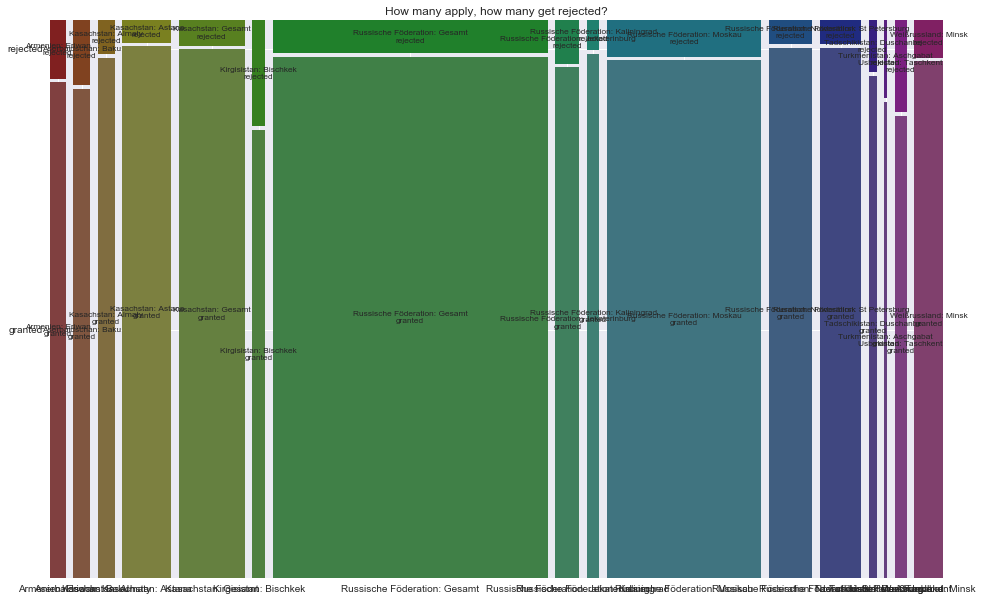

In [42]:
fig, ax = plt.subplots(figsize = (16,10))

mosaic(location_series, gap=0.01, title='How many apply, how many get rejected?', ax = ax)
# plt.savefig('visuals/drafts/marimekko-selection-russia.pdf', transparent = True)
plt.show()

# Reading in population related data

In [43]:
new = pd.read_csv('data/output/PSS-Visa-data_population.csv')

In [44]:
new.columns

Index(['Location', 'Population', 'Schengen_decided_p100K', 'Schengen_decided',
       'Schengen_decided_total', 'Schengen_share_total', 'Schengen_granted',
       'Schengen_rejected', 'Schengen_share_negative', 'GER_decided_p100K',
       'GER_decided', 'GER_decided_total', 'GER_share_total', 'GER_granted',
       'GER_rejected', 'GER_share_negative'],
      dtype='object')

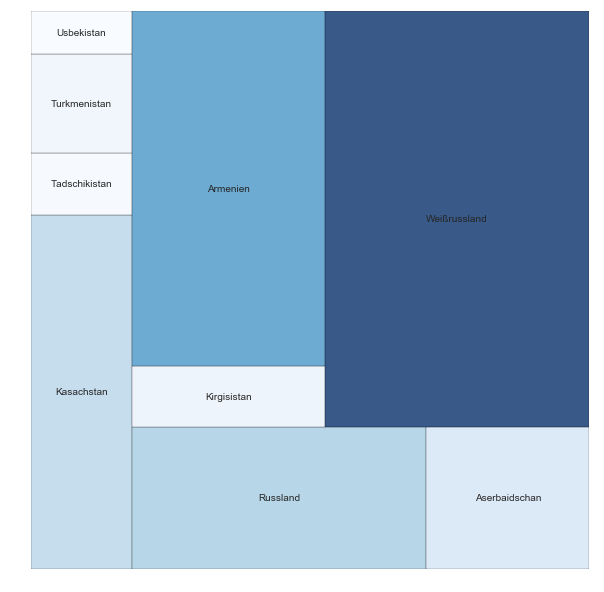

In [45]:
fig, ax = plt.subplots(figsize=(10,10))

cmap = matplotlib.cm.Blues
mini=new['Schengen_decided_p100K'].min()
maxi=new['Schengen_decided_p100K'].max()
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in new['Schengen_decided_p100K']]

squarify.plot(ax = ax , sizes = new['Schengen_decided_p100K'], label = new['Location'], alpha = .8, color = colors)
plt.axis('off')
# plt.savefig('Russland-Treemap.pdf', transparend = True)
plt.show()

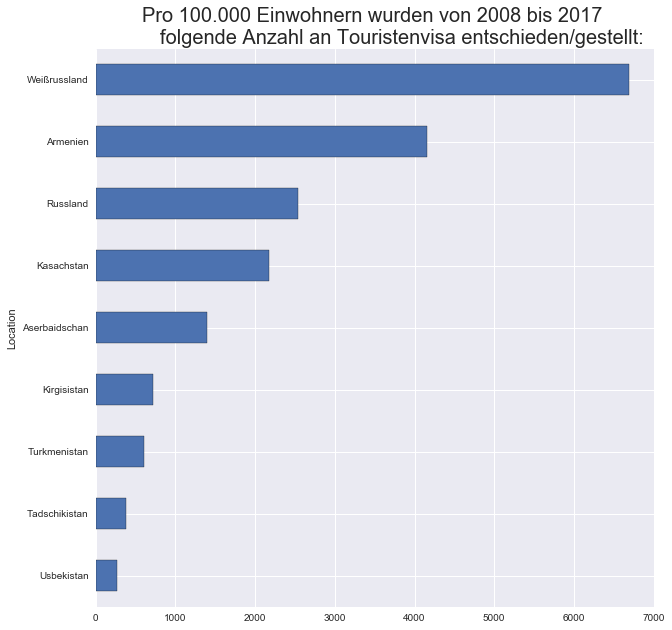

In [46]:
new.sort_values(by='Schengen_decided_p100K',ascending = True).plot(kind='barh', x="Location", y='Schengen_decided_p100K', figsize=(10,10), legend=False)
plt.title("""Pro 100.000 Einwohnern wurden von 2008 bis 2017 
          folgende Anzahl an Touristenvisa entschieden/gestellt:""", fontsize=20)
# plt.savefig("Anträge_p100K.pdf")

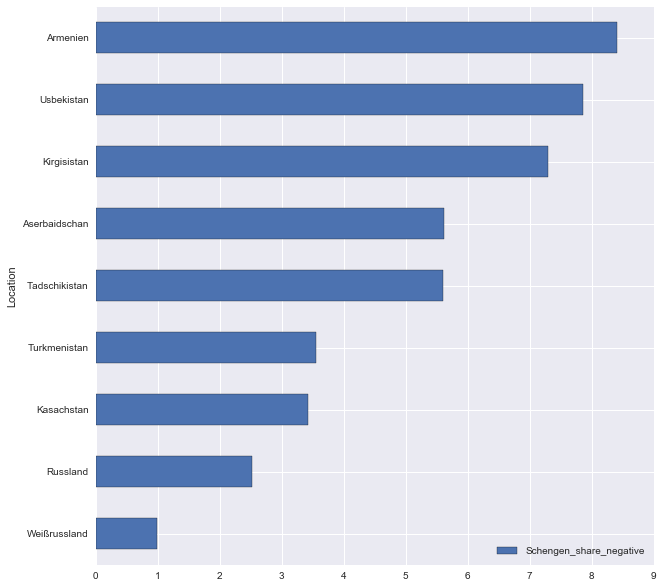

In [60]:
new.sort_values(by='Schengen_share_negative', ascending = True).plot(kind='barh', y='Schengen_share_negative', x='Location', figsize=(10,10))
# plt.savefig('visuals/drafts/tourist-visa-rates-bar.pdf', transparent = True)

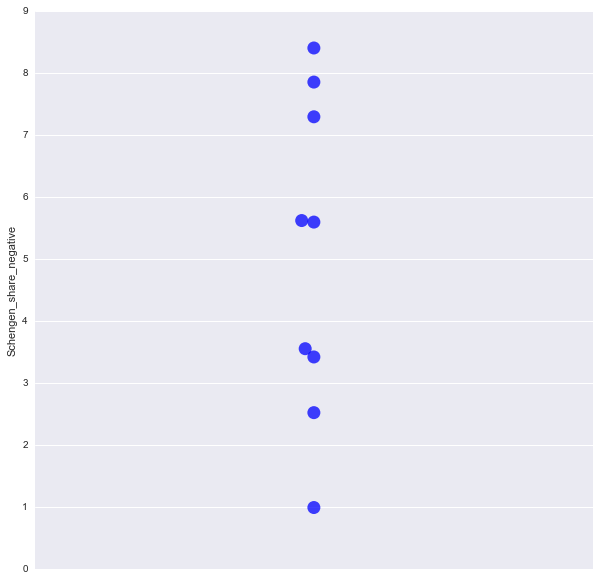

In [70]:
data_selection = new

fig, ax = plt.subplots(figsize = (10,10))
sns.swarmplot(y="Schengen_share_negative", data=data_selection, color="blue", alpha=.75, s=13)
# plt.savefig('visuals/drafts/tourist-visa-rates-swarm.pdf', transparent = True)

In [61]:
new.columns

Index(['Location', 'Population', 'Schengen_decided_p100K', 'Schengen_decided',
       'Schengen_decided_total', 'Schengen_share_total', 'Schengen_granted',
       'Schengen_rejected', 'Schengen_share_negative', 'GER_decided_p100K',
       'GER_decided', 'GER_decided_total', 'GER_share_total', 'GER_granted',
       'GER_rejected', 'GER_share_negative'],
      dtype='object')

In [63]:
possible_decisions_SCH = ['Schengen_granted', 'Schengen_rejected']

mosaic_SCH = pd.DataFrame()

for decision_type in possible_decisions_SCH:
    temp = new[['Location', decision_type]]
    temp['decision'] = decision_type
    temp=temp[['Location', 'decision', decision_type]]
    temp.columns = (['location', 'decision', 'value'])
    mosaic_SCH = mosaic_SCH.append(temp)

In [65]:
mosaic_SCH.sort_values(['location', 'decision'], ascending = [True, True], inplace = True)
mosaic_SCH = mosaic_SCH.reset_index()
mosaic_SCH = mosaic_SCH[['location', 'decision', 'value']]
mosaic_SCH

,location,decision,value
0,Armenien,Schengen_granted,110359
1,Armenien,Schengen_rejected,10131
2,Aserbaidschan,Schengen_granted,123516
3,Aserbaidschan,Schengen_rejected,7362
4,Kasachstan,Schengen_granted,354267
5,Kasachstan,Schengen_rejected,12563
6,Kirgisistan,Schengen_granted,38053
7,Kirgisistan,Schengen_rejected,2996
8,Russland,Schengen_granted,3549123
9,Russland,Schengen_rejected,92003


In [66]:
mosaic_regions_list2 = []

for region in mosaic_SCH['location']:
    mosaic_regions_list2.append(region)
    
mosaic_location_list2 = set(mosaic_regions_list2)
sorted(mosaic_location_list2)

['Armenien',
 'Aserbaidschan',
 'Kasachstan',
 'Kirgisistan',
 'Russland',
 'Tadschikistan',
 'Turkmenistan',
 'Usbekistan',
 'Weißrussland']

In [67]:
location_applications2 = list(product(sorted(mosaic_location_list2), ['granted', 'rejected']))

location_index2 = pd.MultiIndex.from_tuples(location_applications2, names=['place', 'decision'])

location_series2 = pd.Series([float(value) for value in mosaic_SCH['value']], index = location_index2)
location_series2

place          decision
Armenien       granted      110359.0
               rejected      10131.0
Aserbaidschan  granted      123516.0
               rejected       7362.0
Kasachstan     granted      354267.0
               rejected      12563.0
Kirgisistan    granted       38053.0
               rejected       2996.0
Russland       granted     3549123.0
               rejected      92003.0
Tadschikistan  granted       28875.0
               rejected       1713.0
Turkmenistan   granted       31061.0
               rejected       1146.0
Usbekistan     granted       73189.0
               rejected       6242.0
Weißrussland   granted      628481.0
               rejected       6325.0
dtype: float64

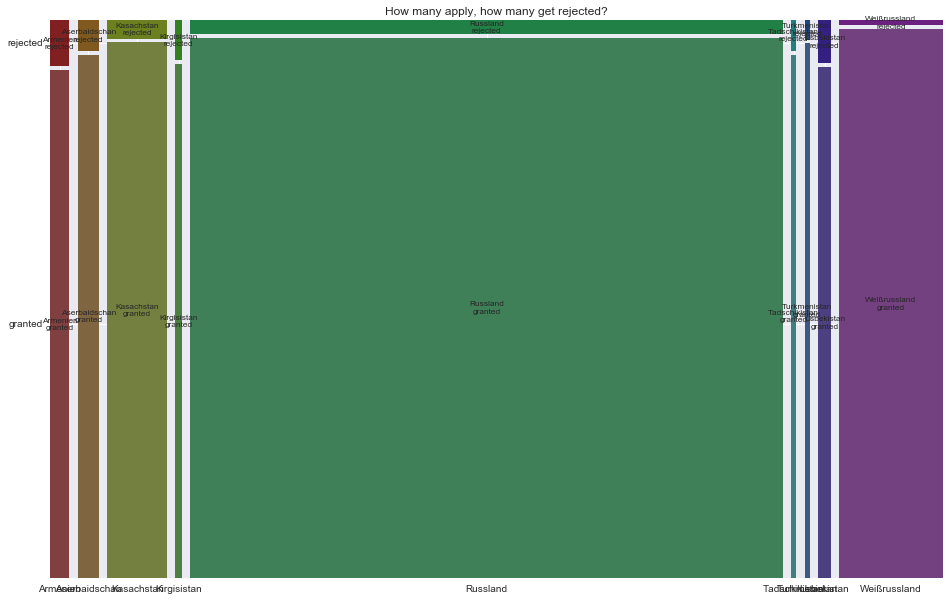

In [69]:
fig, ax = plt.subplots(figsize = (16,10))

mosaic(location_series2, gap=0.01, title='How many apply, how many get rejected?', ax = ax)
# plt.savefig('visuals/drafts/tourist-russia-marimekko.pdf', transparent = True)
plt.show()